In [1]:
import numpy as np
import time
import pandas as pd

def closed_form_solution(A, y):
    return np.linalg.pinv(A.T @ A) @ A.T @ y

def gradient_descent(A, y, iterations=1000):
    m, n = A.shape
    x = np.zeros(n)
    lambda_step = 1 / np.linalg.norm(A, 'fro')**2
    
    for _ in range(iterations):
        x = x - lambda_step * (A.T @ (A @ x - y))
    
    return x

def compare_methods(A_size):
    m, n = A_size
    A = np.random.randn(m, n)
    y = np.random.randn(m)
    
    start_time = time.time()
    x_closed = closed_form_solution(A, y)
    closed_time = time.time() - start_time
    
    start_time = time.time()
    x_gd = gradient_descent(A, y)
    gd_time = time.time() - start_time
    
    return closed_time, gd_time

sizes = [(100, 50), (10000, 5000)]
results = {size: compare_methods(size) for size in sizes}

df = pd.DataFrame(results, index=["Closed-Form Time (s)", "Gradient Descent Time (s)"]).T

print(df)

            Closed-Form Time (s)  Gradient Descent Time (s)
100   50                0.045247                   0.003469
10000 5000             51.239214                  19.943696


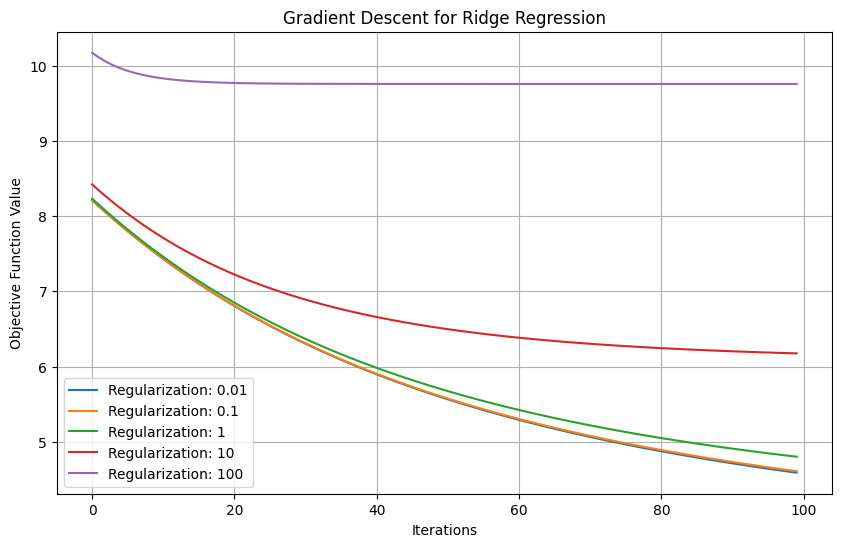

In [2]:
import numpy as np
import matplotlib.pyplot as plt

matrix_A = np.random.rand(100, 50)
target_Y = np.random.rand(100, 1)

U, singular_values, Vt = np.linalg.svd(matrix_A @ matrix_A.T)
max_singular_value = singular_values[0]

regularization_values = [0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(10, 6))
for reg_param in regularization_values:
    step_size = 0.5 / (reg_param + max_singular_value)
    weights = np.zeros((50, 1))
    objective_values = []
    
    for _ in range(100):
        gradient = 2 * (matrix_A.T @ (matrix_A @ weights - target_Y)) + 2 * reg_param * weights
        weights -= step_size * gradient
        objective_value = np.linalg.norm(matrix_A @ weights - target_Y)**2 + reg_param * np.linalg.norm(weights)**2
        objective_values.append(objective_value)
    
    plt.plot(range(100), objective_values, label=f'Regularization: {reg_param}')

plt.legend()
plt.title('Gradient Descent for Ridge Regression')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.grid()
plt.show()

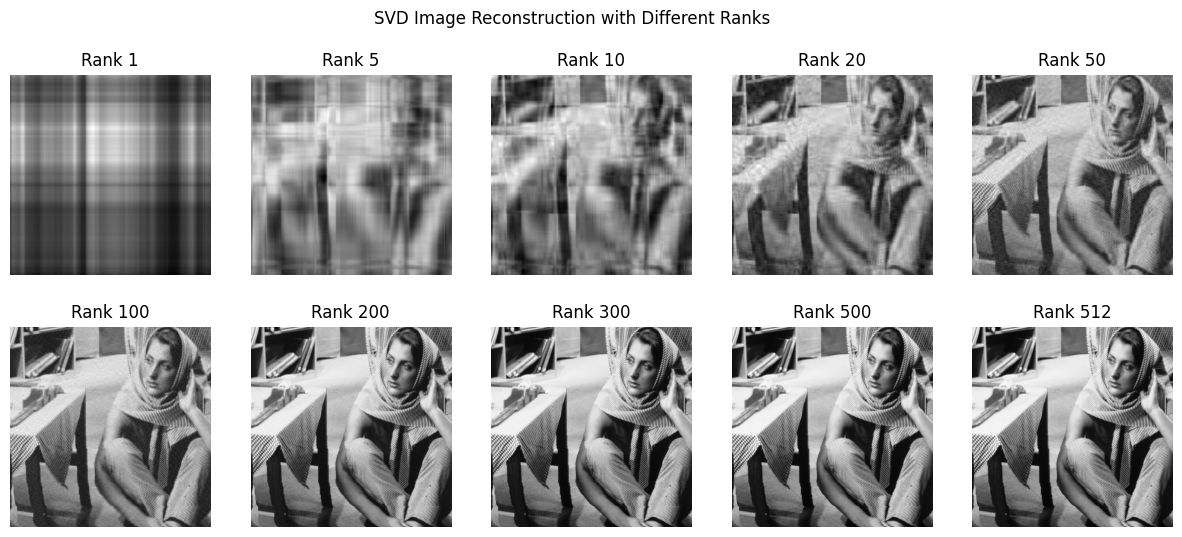

   Rank  Storage Ratio
0     1       0.003910
1     5       0.019550
2    10       0.039101
3    20       0.078201
4    50       0.195503
5   100       0.391006
6   200       0.782013
7   300       1.173019
8   500       1.955032
9   512       2.001953


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

image_path = "barbara.bmp"
image = Image.open(image_path).convert("L")
image_matrix = np.array(image)

U, S, Vt = np.linalg.svd(image_matrix, full_matrices=False)

ranks = [1, 5, 10, 20, 50, 100, 200, 300, 500, 512]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("SVD Image Reconstruction with Different Ranks")

for i, rank in enumerate(ranks):
    reconstructed_image = U[:, :rank] @ np.diag(S[:rank]) @ Vt[:rank, :]
    
    ax = axes[i // 5, i % 5]
    ax.imshow(reconstructed_image, cmap="gray")
    ax.set_title(f"Rank {rank}")
    ax.axis("off")

plt.show()

original_storage = image_matrix.size
storage_ratios = {
    rank: ((U[:, :rank].size + rank + Vt[:rank, :].size) / original_storage)
    for rank in ranks
}

storage_df = pd.DataFrame(list(storage_ratios.items()), columns=["Rank", "Storage Ratio"])
print(storage_df)

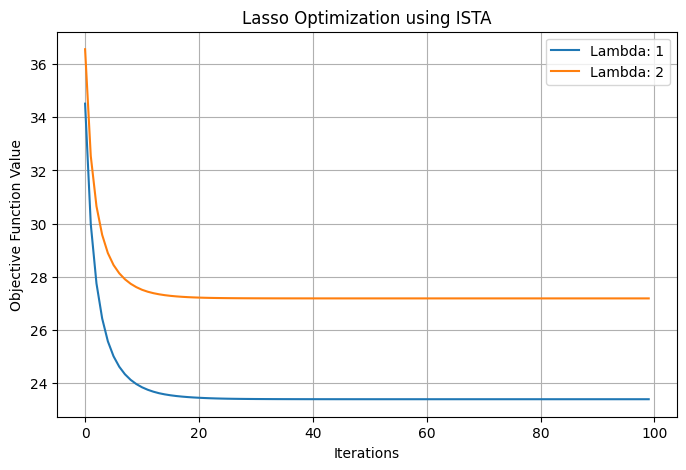


Lasso Regression Coefficients (ISTA vs Scikit-Learn):
      1    2
0  -0.0 -0.0
1   0.0  0.0
2   0.0  0.0
3  -0.0 -0.0
4  -0.0 -0.0
5  -0.0 -0.0
6  -0.0 -0.0
7   0.0  0.0
8  -0.0 -0.0
9  -0.0 -0.0
10  0.0  0.0
11 -0.0 -0.0
12  0.0  0.0
13  0.0  0.0
14 -0.0 -0.0
15  0.0  0.0
16 -0.0 -0.0
17 -0.0 -0.0
18 -0.0 -0.0
19  0.0  0.0
20 -0.0 -0.0
21 -0.0 -0.0
22 -0.0 -0.0
23 -0.0 -0.0
24 -0.0 -0.0
25 -0.0 -0.0
26  0.0  0.0
27  0.0  0.0
28  0.0  0.0
29  0.0  0.0
30  0.0  0.0
31 -0.0 -0.0
32  0.0  0.0
33  0.0  0.0
34 -0.0 -0.0
35  0.0  0.0
36 -0.0 -0.0
37  0.0  0.0
38  0.0  0.0
39  0.0  0.0
40 -0.0 -0.0
41 -0.0 -0.0
42 -0.0 -0.0
43  0.0  0.0
44  0.0  0.0
45 -0.0 -0.0
46  0.0  0.0
47  0.0  0.0
48  0.0  0.0
49 -0.0 -0.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import pandas as pd

np.random.seed(42)
A = np.random.randn(100, 50)
y = np.random.randn(100)

U, S, Vt = np.linalg.svd(A @ A.T)
sigma_max = S[0]

lambda_values = [1, 2]
iterations = 100

objective_values = {}

for lambda_val in lambda_values:
    step_size = 1 / sigma_max
    x = np.zeros(50)
    objective_values[lambda_val] = []
    
    for _ in range(iterations):
        z = x - step_size * A.T @ (A @ x - y)
        x = np.sign(z) * np.maximum(np.abs(z) - step_size * lambda_val, 0)
        objective = 0.5 * np.linalg.norm(A @ x - y) ** 2 + lambda_val * np.linalg.norm(x, 1)
        objective_values[lambda_val].append(objective)

plt.figure(figsize=(8, 5))
for lambda_val in lambda_values:
    plt.plot(range(iterations), objective_values[lambda_val], label=f'Lambda: {lambda_val}')

plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("Lasso Optimization using ISTA")
plt.legend()
plt.grid()
plt.show()

# Comparing with Scikit-Learn's Lasso
sklearn_lasso = {}
for lambda_val in lambda_values:
    model = Lasso(alpha=lambda_val, max_iter=1000, tol=1e-6)
    model.fit(A, y)
    sklearn_lasso[lambda_val] = model.coef_

lasso_comparison_df = pd.DataFrame(sklearn_lasso)
print("\nLasso Regression Coefficients (ISTA vs Scikit-Learn):")
print(lasso_comparison_df)